In [1]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from IPython.display import Image, display
import matplotlib.pyplot as plt
# from IPython.display import Image, display

In [2]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    treefiles = glob.glob(f'{directory}*tree_*')
    num_trees_per_strat = len(treefiles)
    for i in range(0, int(num_trees_per_strat)):
        for f in glob.glob(f'{directory}*tree_*_{i}*'):
            file = open(f)
            dot_string = file.read()
            print(f)
            print(dot_string)
            graph = pydot.graph_from_dot_data(dot_string)[0]
            view_pydot(graph)
            print('\n')
            
def show_stats(directory):
    fs = glob.glob(f'{directory}*experiment_stats')
    df = pd.concat([pd.read_csv(f) for f in fs])
    return df

def determine_shape(x, shape_assignment_dict):
    return shape_assignment_dict[x]

def determine_color(x, color_assignment_dict):
    return color_assignment_dict[x]

def scatter_plots(df, x, y, xlabel, ylabel, title, shape_assignment_dict, color_assignment_dict,
                 first_legend_pos, second_legend_pos, strat_legend_rel_pos, ratio_legend_re_pos):
        
    fig, ax = plt.subplots()
    groups = df.groupby(['strat','complaint_ratio'])
    # Create a scatter plot for each group based on shape and color
    for (strat, ratio), group in groups:
        marker = shape_assignment_dict.get(strat)
        color=color_assignment_dict.get(ratio)
        ax.scatter(group[x], group[y], marker=marker, color=color, label=(strat, ratio))

    # Create separate shape and color legends
    legend_elements_1 = []
    legend_elements_2 = []

    for shape, marker in shape_assignment_dict.items():
        legend_elements_1.append(plt.Line2D([0], [0], marker=marker, color='w', label=shape, markerfacecolor='k'))
    for ratio, color in color_assignment_dict.items():
        legend_elements_2.append(plt.Line2D([0], [0], marker='o', color='w', label=ratio, markerfacecolor=color))

    # Add shape and color legends
    first_legend=ax.legend(handles=legend_elements_1, loc=first_legend_pos, 
                           bbox_to_anchor=strat_legend_rel_pos,
                           title='strategy', 
                           fontsize=13,title_fontsize=14)
    ax.legend(handles=legend_elements_2, loc=second_legend_pos, 
              bbox_to_anchor=ratio_legend_re_pos, title='complaint%',
              fontsize=13, title_fontsize=14)

    ax.add_artist(first_legend)

    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)

    plt.show()
    plt.close(fig)

    
def line_plots(df, x, y, xlabel, ylabel, title, color_assignment_dict, legend_pos, group_name,
               group_value, gtype='general',
               ylim=None,
              ):
    fig, ax = plt.subplots()
    df=df[df[group_name]==group_value]
    # Create a scatter plot for each group based on shape and color
    groups = df.groupby(['strat'])
    for strat, group in groups:
        color = color_assignment_dict.get(strat)
        ax.plot(group[x], group[y], color=color, label=strat)
    if(gtype=='accuracy'):
        ax.plot(df[x], df['global_accuracy'], color='blue', label='accuracy_before_fix')
    ax.legend()
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)
    if(ylim):
        ax.set_ylim(ylim)
    plt.show()
    plt.close(fig)
#     return plt

In [3]:
df_diff_nums_lfs=show_stats('../experiment_diff_num_lfs_609/')
df_diff_user_input=show_stats('../exp_vary_user_input_and_comp_ratio609/')

In [4]:
df_diff_nums_lfs['strat'] = df_diff_nums_lfs['strat'].str.replace('information_gain', 'decision tree')
df_diff_nums_lfs['user_input_size'] = df_diff_nums_lfs['num_complaints'] + df_diff_nums_lfs['confirmation_cnt']
df_diff_nums_lfs['complaint_ratio'] = df_diff_nums_lfs['num_complaints']/df_diff_nums_lfs['user_input_size']
df_diff_nums_lfs['complaint_ratio'] = df_diff_nums_lfs['complaint_ratio'].map(lambda x: f'{x * 100:.2f}%')
df_diff_nums_lfs['accuracy_improvement'] = df_diff_nums_lfs['new_global_accuracy']/df_diff_nums_lfs['global_accuracy']
# grouped = df_diff_nums_lfs.groupby(['strat','complaint_ratio','user_input_size','deletion_factor','num_functions']).mean()
df_diff_user_input['strat'] = df_diff_user_input['strat'].str.replace('information_gain', 'decision tree')
df_diff_user_input['user_input_size'] = df_diff_user_input['num_complaints'] + df_diff_user_input['confirmation_cnt']
df_diff_user_input['complaint_ratio'] = df_diff_user_input['num_complaints']/df_diff_user_input['user_input_size']
df_diff_user_input['complaint_ratio'] = df_diff_user_input['complaint_ratio'].map(lambda x: f'{x * 100:.2f}%')
df_diff_user_input['accuracy_improvement'] = df_diff_user_input['new_global_accuracy']/df_diff_user_input['global_accuracy']
# # Reset the index
# df_diff_nums_lfs = grouped.reset_index()

# unique_ratios=list(df_diff_nums_lfs['strat'].unique())
# markers=['v','o', '^','h', 'H', '$...$', 'x', '+', 'D', 'd']
# used_markers=len(unique_ratios)
# shape_assignment_dict = {k: v for k, v in zip(unique_ratios, markers[:used_markers])}

# unique_strats=list(df_diff_nums_lfs['complaint_ratio'].unique())
# colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
# used_colors=len(unique_strats)
# color_assignment_dict = {k: v for k, v in zip(unique_strats, colors[:used_colors])}

line_color_assignment_dict={'naive':'g','decision tree':'r', 'brute_force': 'b'}

# Brute force results:

In [5]:
brute_df_diff_nums_lfs=df_diff_nums_lfs[df_diff_nums_lfs['strat']=='brute_force']
brute_df_diff_user_input=df_diff_user_input[df_diff_user_input['strat']=='brute_force']

In [6]:
brute_df_diff_user_input

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,user_input_size,complaint_ratio,accuracy_improvement
0,brute_force,0.021,0.200000,0,5,0.7,1.000,1.000,0.699,1539,1539,10,0.0,10,9,5,0.00%,0.998571
0,brute_force,0.028,0.200000,0,5,0.7,1.000,1.000,0.699,1539,1539,10,0.3,10,9,5,0.00%,0.998571
0,brute_force,0.020,0.200000,0,5,0.7,1.000,1.000,0.699,1539,1539,10,0.5,10,9,5,0.00%,0.998571
0,brute_force,0.016,0.000000,0,5,0.7,1.000,1.000,0.813,1539,1440,10,0.7,9,9,5,0.00%,1.161429
0,brute_force,0.043,0.400000,1,4,0.7,1.000,1.000,0.686,1539,1539,10,0.0,10,9,5,20.00%,0.980000
0,brute_force,0.037,0.400000,1,4,0.7,1.000,1.000,0.686,1539,1539,10,0.3,10,9,5,20.00%,0.980000
0,brute_force,0.049,0.400000,1,4,0.7,1.000,1.000,0.686,1539,1539,10,0.5,10,9,5,20.00%,0.980000
0,brute_force,0.034,0.000000,1,4,0.7,0.000,1.000,0.736,1539,1362,10,0.7,8,9,5,20.00%,1.051429
0,brute_force,0.041,0.400000,2,3,0.7,0.000,1.000,0.734,1539,1539,10,0.0,10,9,5,40.00%,1.048571
0,brute_force,0.049,0.400000,2,3,0.7,0.000,1.000,0.734,1539,1539,10,0.3,10,9,5,40.00%,1.048571


In [7]:
brute_df_diff_user_input=brute_df_diff_user_input[brute_df_diff_user_input['deletion_factor']==0.5]

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


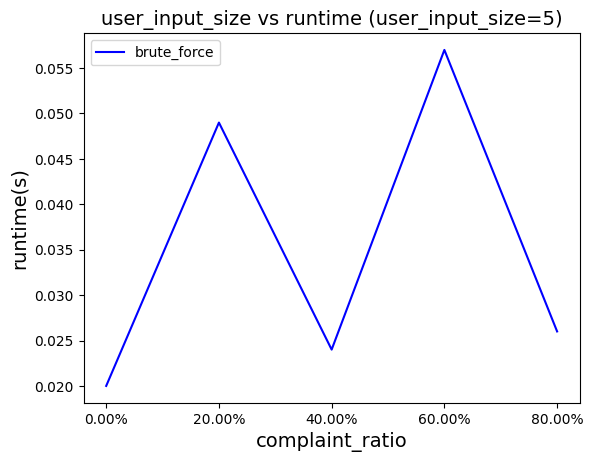

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


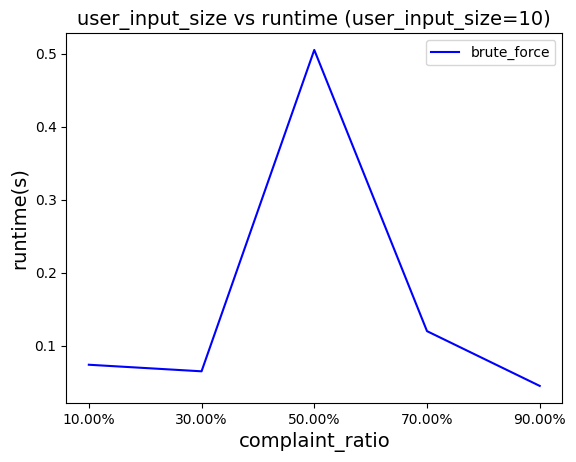

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


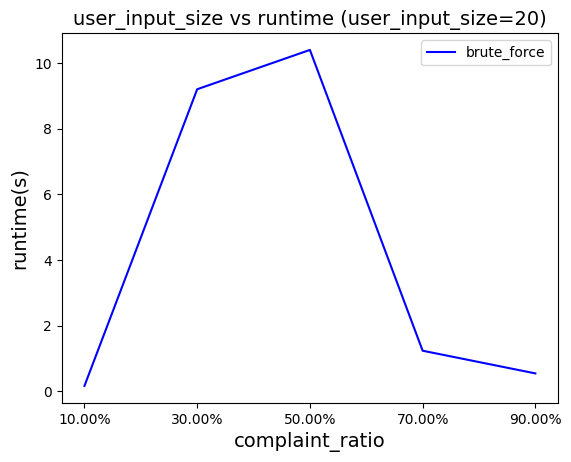

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


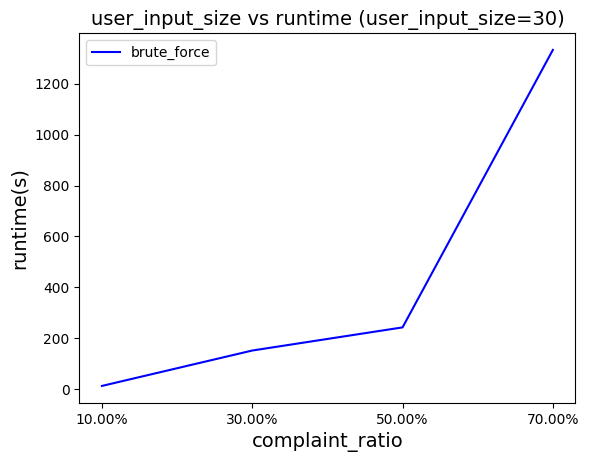

In [8]:
for input_size in list(brute_df_diff_user_input['user_input_size'].unique()):
    line_plots(df=brute_df_diff_user_input, 
               x='complaint_ratio', 
               y='runtime', 
               xlabel='complaint_ratio',
               ylabel='runtime(s)', 
               title=f'user_input_size vs runtime (user_input_size={input_size})',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center',
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

In [9]:
df_diff_user_input_runtime=df_diff_user_input[(df_diff_user_input['strat']!='brute_force') &\
                                      (df_diff_user_input['deletion_factor']==0.5)]
df_diff_user_input_avg_tree=df_diff_user_input[(df_diff_user_input['strat']!='brute_force') &\
                                      (df_diff_user_input['deletion_factor']==0)]
df_diff_user_input_deletion_factor=df_diff_user_input[(df_diff_user_input['strat']!='brute_force')&\
                                                     (df_diff_user_input['complaint_ratio']=='50.00%')]

In [ ]:
|after_the_fix| / |size_pre_fix| * deletion_factor op 1 

#   10 / 4 * 0.5 > 1
    


# The following are without brute force
###  1. fix deletion factor at 0.5, see the complaint ratio vs runtime for different user input size

`Conclusion from this: the more user complaint we have the more time spent`

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


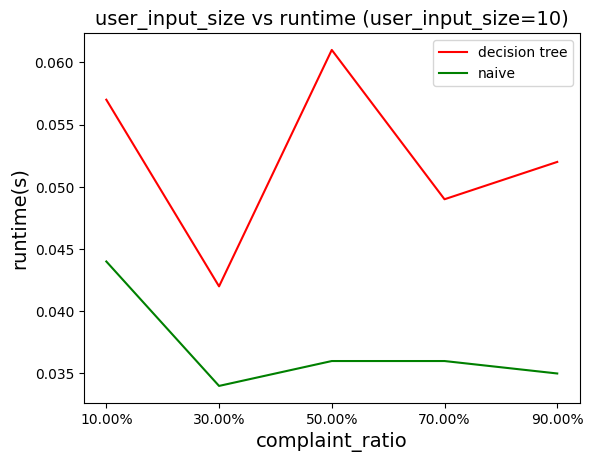

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


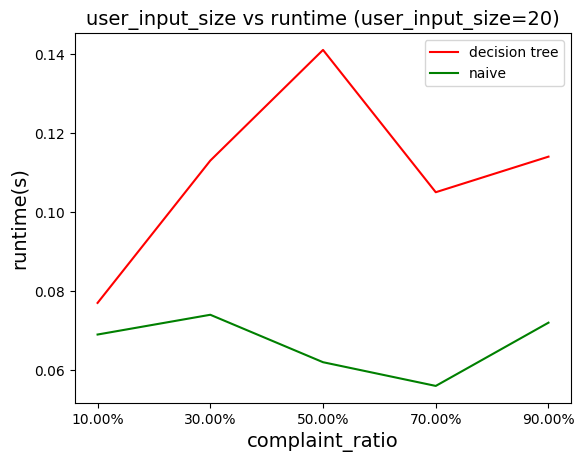

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


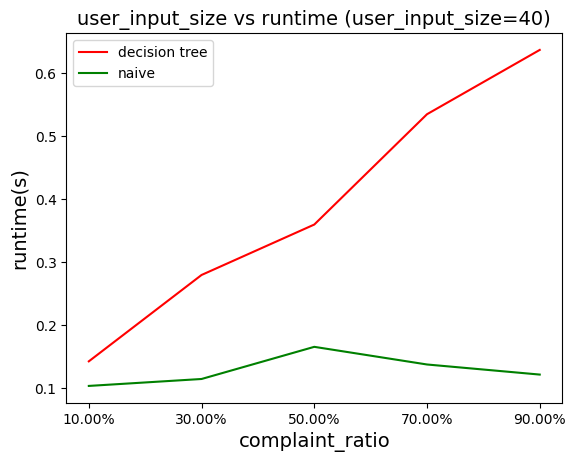

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


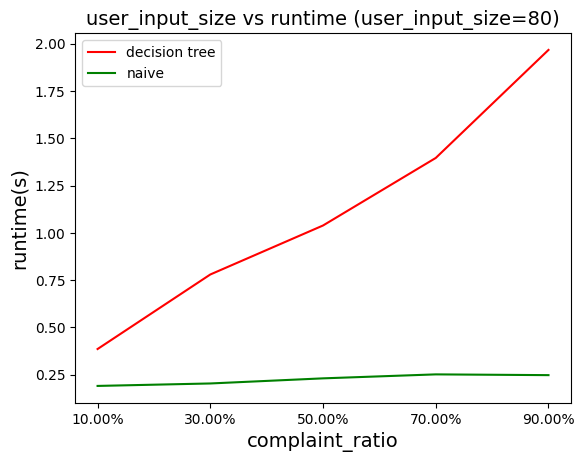

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


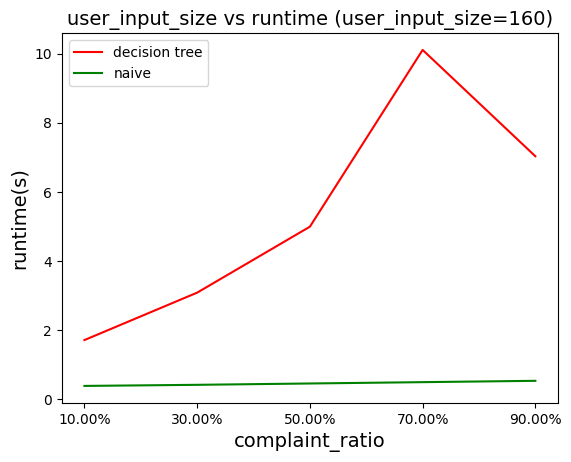

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


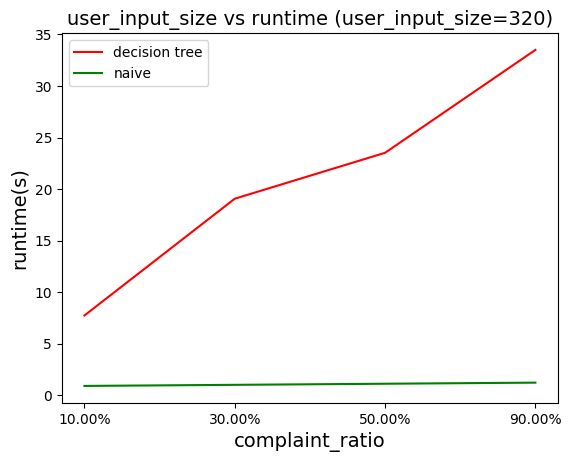

In [10]:
# for input_size in list(df_diff_user_input['user_input_size'].unique()):
#     line_plots(df_without_brute, 'deletion_factor', 'avg_tree_size_increase', 'deletion_factor', 'avg tree size increase', f'deletion_factor vs tree size increase num_func={num_func}', 
#                                 line_color_assignment_dict, 'lower center', num_func)

for input_size in list(df_diff_user_input_runtime['user_input_size'].unique()):
    line_plots(df=df_diff_user_input_runtime, 
               x='complaint_ratio', 
               y='runtime', 
               xlabel='complaint_ratio',
               ylabel='runtime(s)', 
               title=f'user_input_size vs runtime (user_input_size={input_size})',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center',
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

###  2. fix deletion factor at 0 (no deletion), see the tree size increase differences for different user input

`Conclusion from this: decision tree version is much better`

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


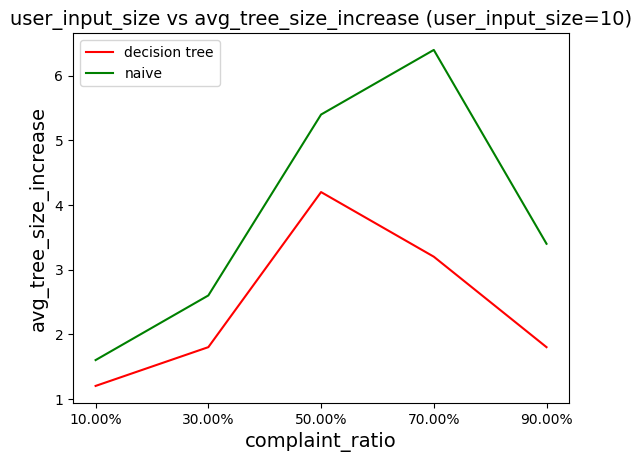

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


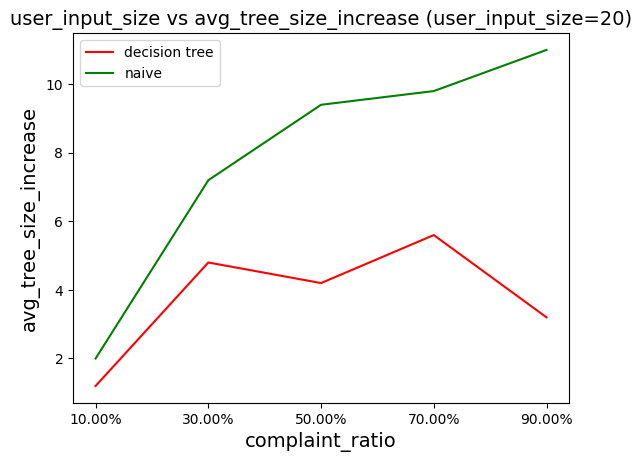

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


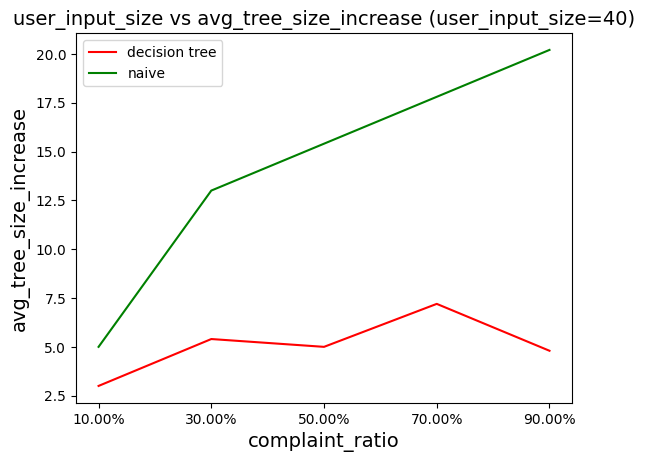

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


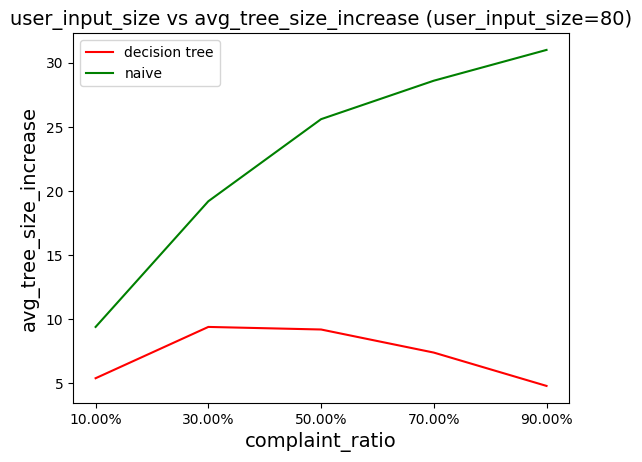

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


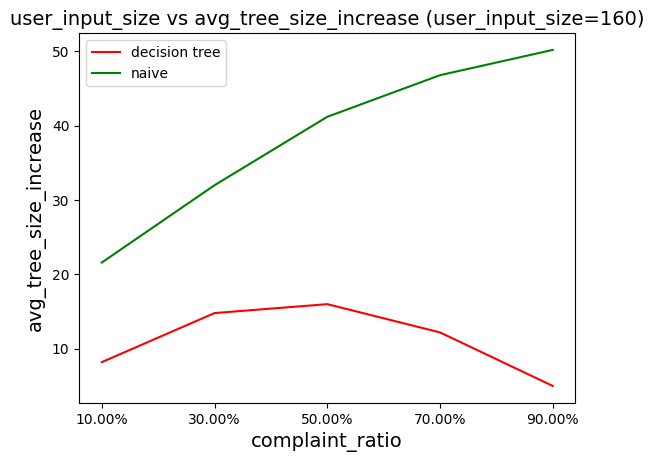

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


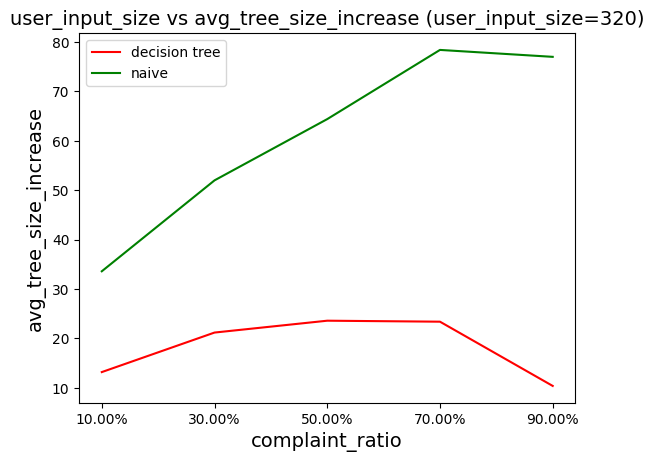

In [28]:
for input_size in list(df_diff_user_input_avg_tree['user_input_size'].unique()):
    line_plots(df=df_diff_user_input_avg_tree, 
               x='complaint_ratio', 
               y='avg_tree_size_increase', 
               xlabel='complaint_ratio',
               ylabel='avg_tree_size_increase', 
               title=f'user_input_size vs avg_tree_size_increase (user_input_size={input_size})',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center',
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

###  3. fix complaint ratio at 50%, see the tree size increase differences for different user input

`Conclusion from this: both versions the tree sizes converge when deletion factor around 0.3`

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


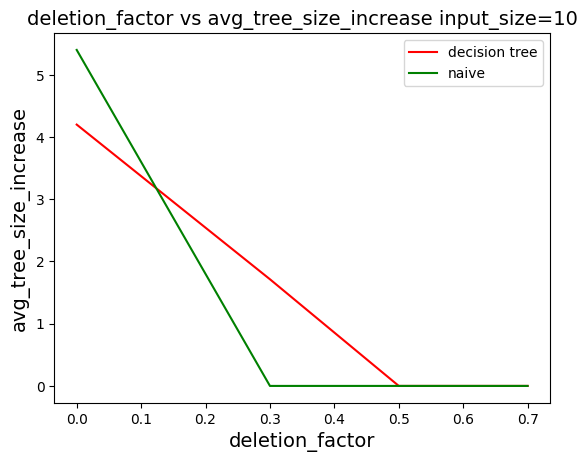

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


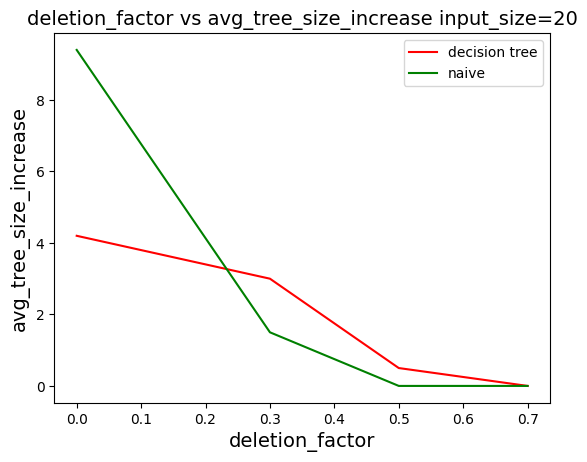

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


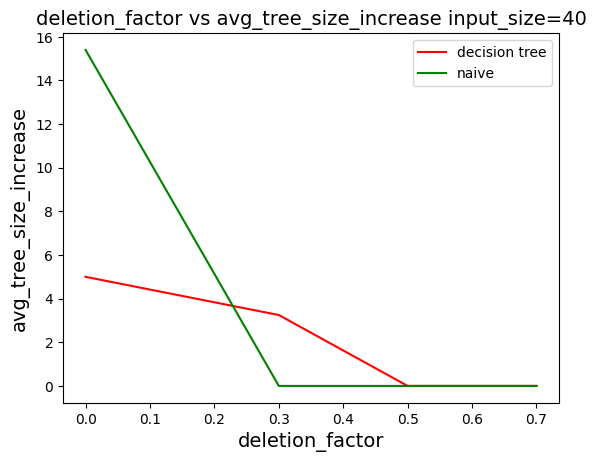

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


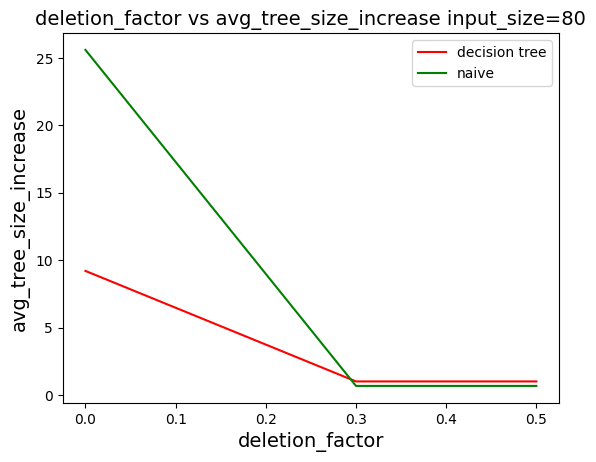

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


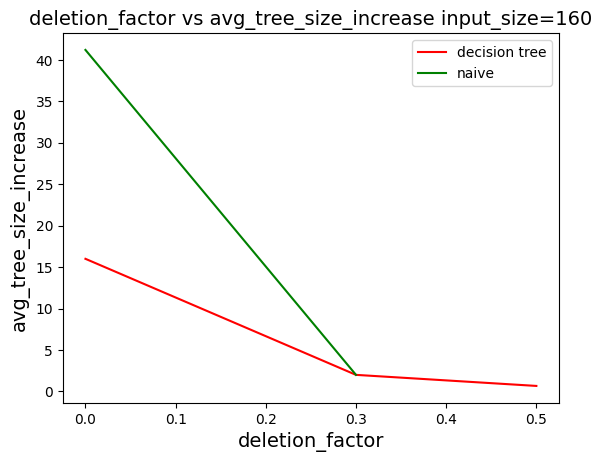

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


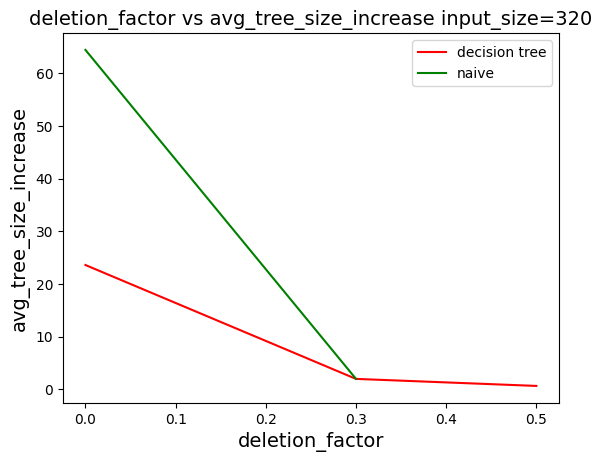

In [19]:
for input_size in list(df_diff_user_input_deletion_factor['user_input_size'].unique()):
    line_plots(df=df_diff_user_input_deletion_factor, 
               x='deletion_factor', 
               y='avg_tree_size_increase', 
               xlabel='deletion_factor',
               ylabel='avg_tree_size_increase', 
               title=f'deletion_factor vs avg_tree_size_increase input_size={input_size}',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

### 4. fix complaint ratio at 50%, see the global accuracy difference for different user input

`Conclusion from this: decision tree is performing worse than naive`

In [27]:
df_diff_user_input_deletion_factor

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,user_input_size,complaint_ratio,accuracy_improvement
0,decision tree,0.079,4.200000,5,5,0.7,0.800,1.000,0.761,1539,1539,10,0.0,10,9,10,50.00%,1.087143
0,naive,0.027,5.400000,5,5,0.7,0.600,1.000,0.751,1539,1539,10,0.0,10,9,10,50.00%,1.072857
0,decision tree,0.056,1.714286,5,5,0.7,0.200,1.000,0.676,1539,1131,10,0.3,7,9,10,50.00%,0.965714
0,naive,0.036,0.000000,5,5,0.7,0.800,1.000,0.773,1539,883,10,0.3,5,9,10,50.00%,1.104286
0,decision tree,0.061,0.000000,5,5,0.7,0.800,1.000,0.773,1539,883,10,0.5,5,9,10,50.00%,1.104286
0,naive,0.036,0.000000,5,5,0.7,0.800,1.000,0.773,1539,883,10,0.5,5,9,10,50.00%,1.104286
0,decision tree,0.064,0.000000,5,5,0.7,0.800,1.000,0.773,1539,883,10,0.7,5,9,10,50.00%,1.104286
0,naive,0.043,0.000000,5,5,0.7,0.800,1.000,0.773,1539,883,10,0.7,5,9,10,50.00%,1.104286
0,decision tree,0.138,4.200000,10,10,0.7,0.400,1.000,0.743,1539,1539,10,0.0,10,9,20,50.00%,1.061429
0,naive,0.075,9.400000,10,10,0.7,0.800,1.000,0.786,1539,1539,10,0.0,10,9,20,50.00%,1.122857


           strat  runtime  avg_tree_size_increase  num_complaints  \
0  decision tree    0.079                4.200000               5   
0          naive    0.027                5.400000               5   
0  decision tree    0.056                1.714286               5   
0          naive    0.036                0.000000               5   
0  decision tree    0.061                0.000000               5   
0          naive    0.036                0.000000               5   
0  decision tree    0.064                0.000000               5   
0          naive    0.043                0.000000               5   

   confirmation_cnt  global_accuracy  fix_rate  confirm_preserve_rate  \
0                 5              0.7       0.8                    1.0   
0                 5              0.7       0.6                    1.0   
0                 5              0.7       0.2                    1.0   
0                 5              0.7       0.8                    1.0   
0            

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


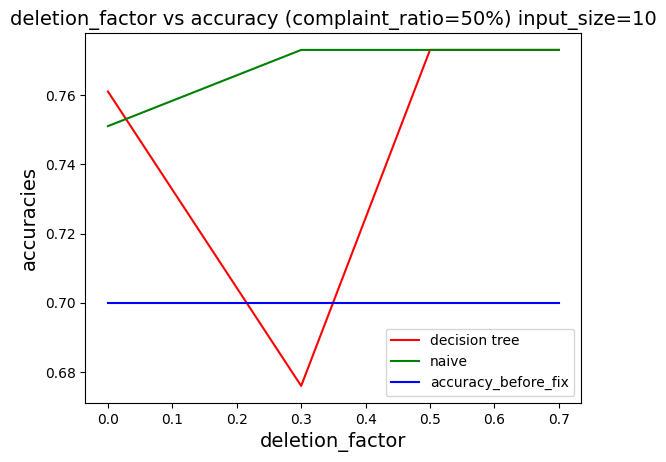

           strat  runtime  avg_tree_size_increase  num_complaints  \
0  decision tree    0.138                     4.2              10   
0          naive    0.075                     9.4              10   
0  decision tree    0.129                     3.0              10   
0          naive    0.074                     1.5              10   
0  decision tree    0.141                     0.5              10   
0          naive    0.062                     0.0              10   
0  decision tree    0.144                     0.0              10   
0          naive    0.079                     0.0              10   

   confirmation_cnt  global_accuracy  fix_rate  confirm_preserve_rate  \
0                10              0.7       0.4                    1.0   
0                10              0.7       0.8                    1.0   
0                10              0.7       0.8                    0.9   
0                10              0.7       0.9                    1.0   
0            

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


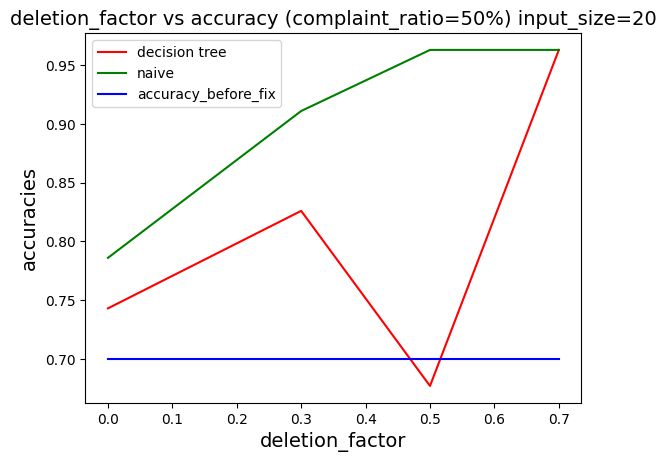

           strat  runtime  avg_tree_size_increase  num_complaints  \
0  decision tree    0.377                    5.00              20   
0          naive    0.186                   15.40              20   
0  decision tree    0.367                    3.25              20   
0          naive    0.120                    0.00              20   
0  decision tree    0.360                    0.00              20   
0          naive    0.166                    0.00              20   
0  decision tree    0.364                    0.00              20   
0          naive    0.145                    0.00              20   

   confirmation_cnt  global_accuracy  fix_rate  confirm_preserve_rate  \
0                20              0.7      0.65                   1.00   
0                20              0.7      0.85                   1.00   
0                20              0.7      0.35                   0.95   
0                20              0.7      1.00                   1.00   
0            

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


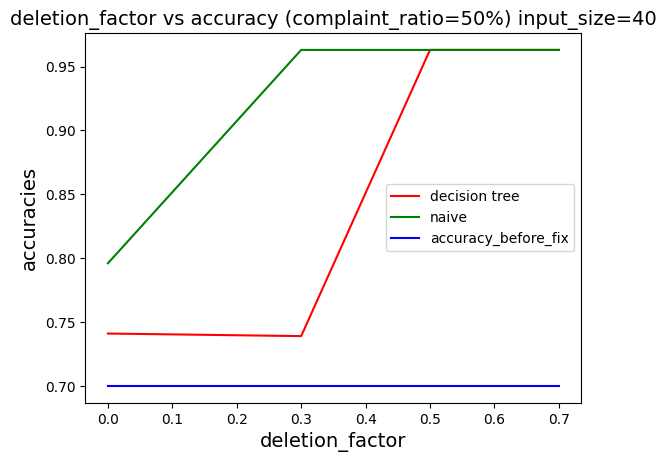

           strat  runtime  avg_tree_size_increase  num_complaints  \
0  decision tree    1.051                9.200000              40   
0          naive    0.218               25.600000              40   
0  decision tree    1.058                1.000000              40   
0          naive    0.232                0.666667              40   
0  decision tree    1.039                1.000000              40   
0          naive    0.231                0.666667              40   

   confirmation_cnt  global_accuracy  fix_rate  confirm_preserve_rate  \
0                40              0.7     0.900                  1.000   
0                40              0.7     0.925                  1.000   
0                40              0.7     0.900                  0.925   
0                40              0.7     1.000                  1.000   
0                40              0.7     0.900                  0.925   
0                40              0.7     1.000                  1.000   

   n

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


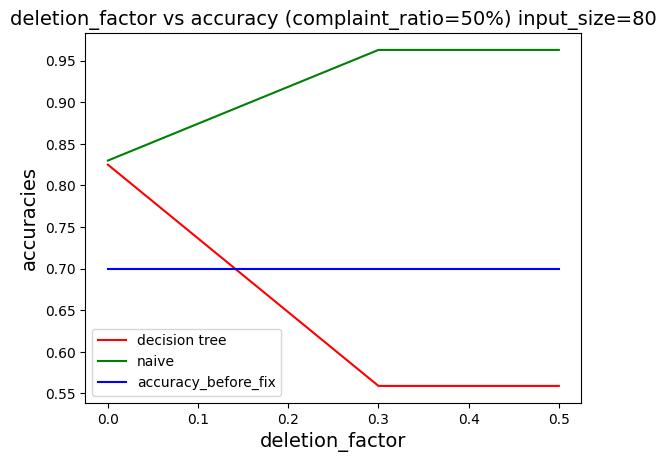

           strat  runtime  avg_tree_size_increase  num_complaints  \
0  decision tree    4.646               16.000000              80   
0          naive    0.452               41.200000              80   
0  decision tree    4.651                2.000000              80   
0          naive    0.457                2.000000              80   
0  decision tree    4.989                0.666667              80   

   confirmation_cnt  global_accuracy  fix_rate  confirm_preserve_rate  \
0                80              0.7     0.950                    1.0   
0                80              0.7     0.938                    1.0   
0                80              0.7     0.838                    0.9   
0                80              0.7     0.975                    1.0   
0                80              0.7     0.850                    0.9   

   new_global_accuracy  prev_signaled_cnt  new_signaled_cnt  num_functions  \
0                0.880               1539              1539         

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


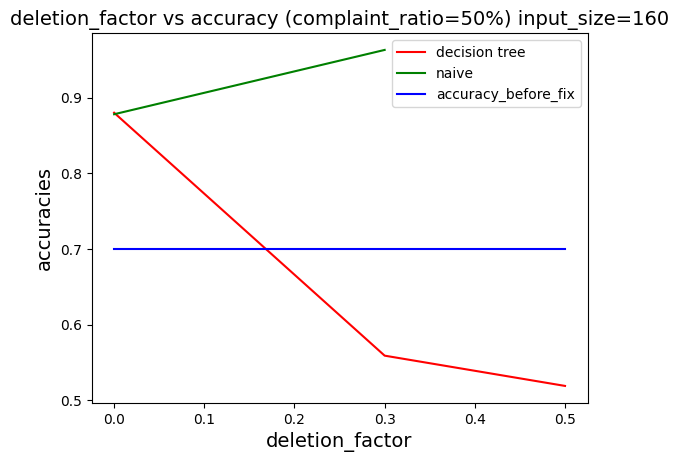

           strat  runtime  avg_tree_size_increase  num_complaints  \
0  decision tree   23.669               23.600000             160   
0          naive    1.073               64.400000             160   
0  decision tree   29.634                2.000000             160   
0          naive    1.088                2.000000             160   
0  decision tree   23.517                0.666667             160   

   confirmation_cnt  global_accuracy  fix_rate  confirm_preserve_rate  \
0               160              0.7     0.969                  1.000   
0               160              0.7     0.944                  1.000   
0               160              0.7     0.850                  0.887   
0               160              0.7     0.988                  1.000   
0               160              0.7     0.856                  0.887   

   new_global_accuracy  prev_signaled_cnt  new_signaled_cnt  num_functions  \
0                0.914               1539              1539         

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


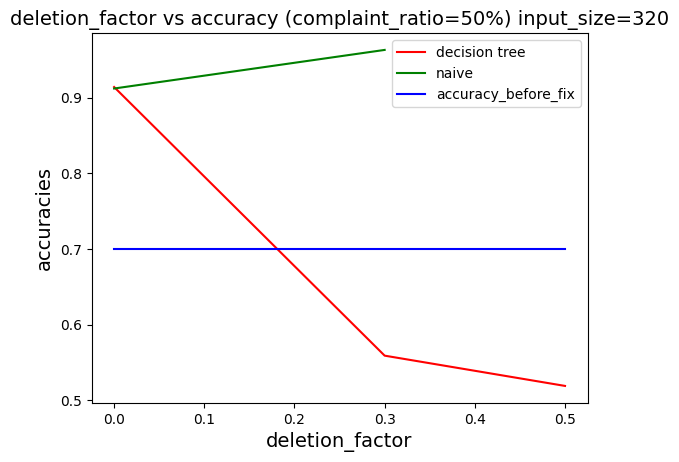

In [26]:
for input_size in list(df_diff_user_input_deletion_factor['user_input_size'].unique()):
    print(df_diff_user_input_deletion_factor[df_diff_user_input_deletion_factor['user_input_size']==input_size])
    line_plots(df=df_diff_user_input_deletion_factor, 
               x='deletion_factor', 
               y='new_global_accuracy', 
               xlabel='deletion_factor',
               ylabel='accuracies', 
               title=f'deletion_factor vs accuracy (complaint_ratio=50%) input_size={input_size}',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='accuracy',
               ylim=None)

### 5. fix complaint ratio at 50%, see the number of funcs left for different user input

`Conclusion from this: decision tree is performing worse than naive`

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


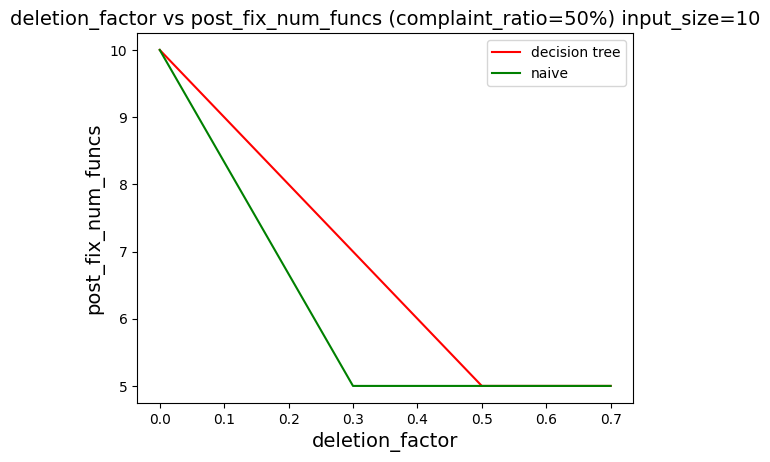

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


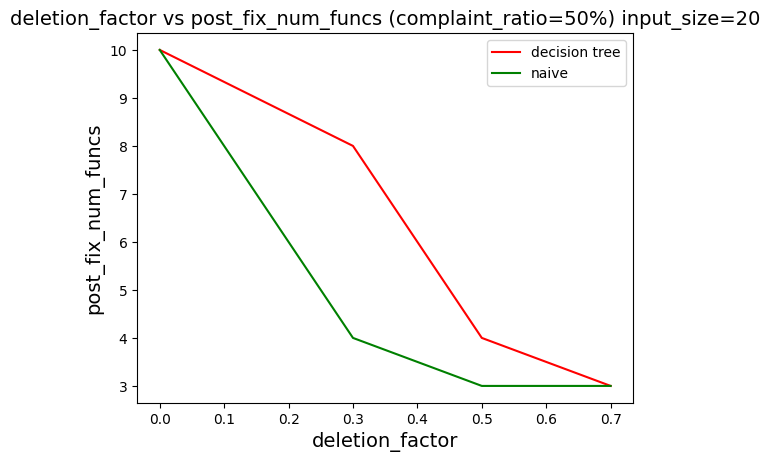

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


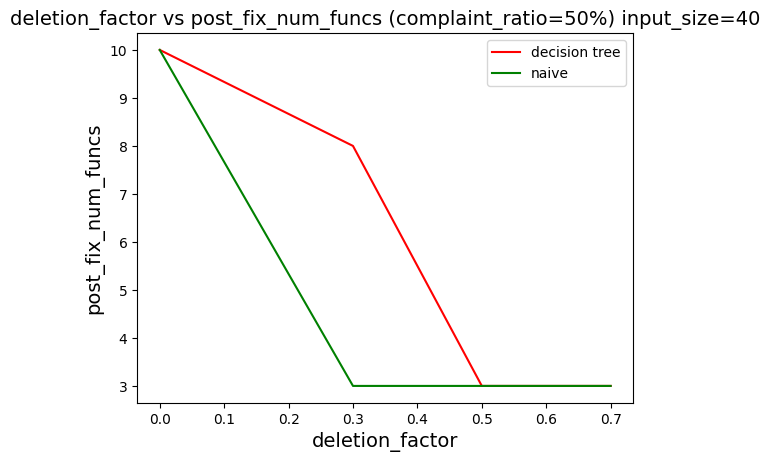

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


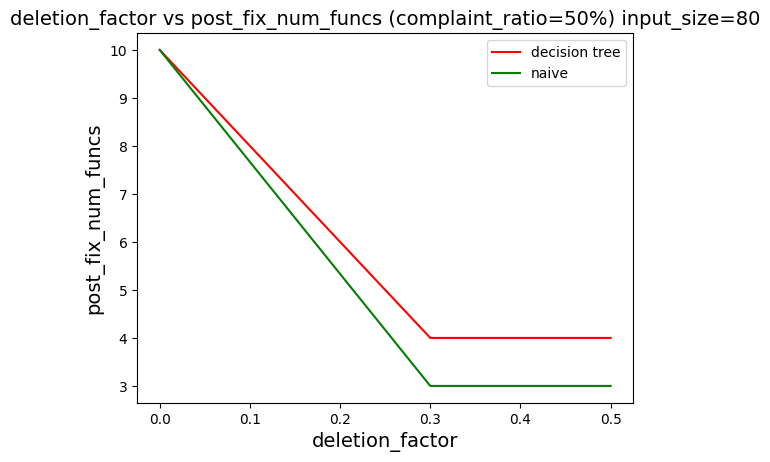

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


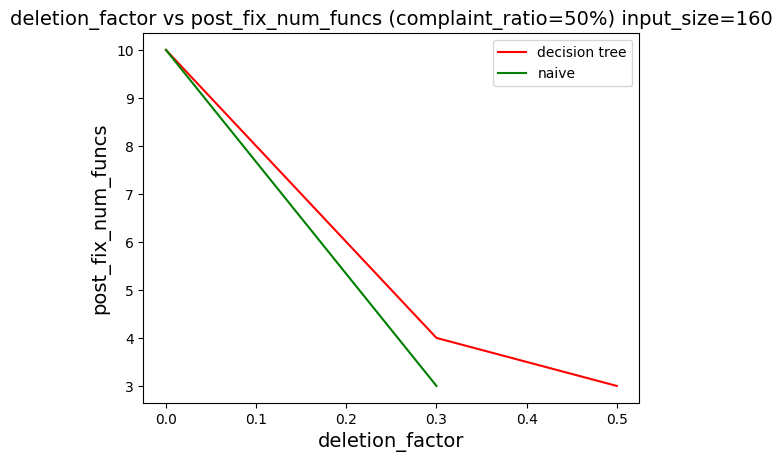

/tmp/ipykernel_14046/538088579.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


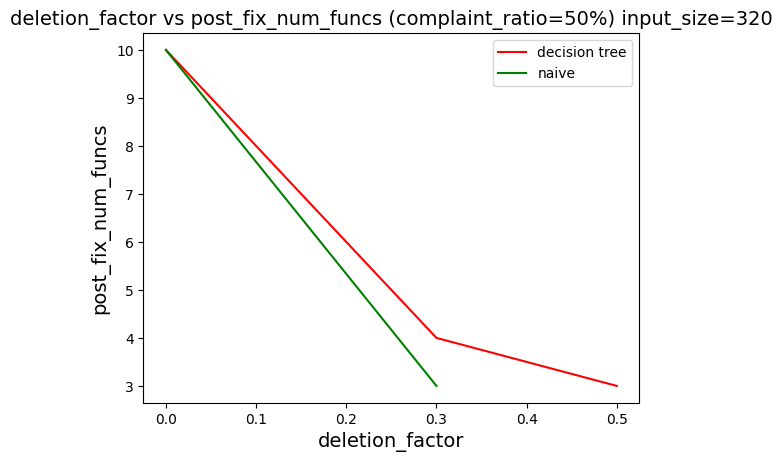

In [24]:
for input_size in list(df_diff_user_input_deletion_factor['user_input_size'].unique()):
#     print(df_diff_user_input_deletion_factor[df_diff_user_input_deletion_factor['user_input_size']==num_func)
    line_plots(df=df_diff_user_input_deletion_factor, 
               x='deletion_factor', 
               y='post_fix_num_funcs', 
               xlabel='deletion_factor',
               ylabel='post_fix_num_funcs', 
               title=f'deletion_factor vs post_fix_num_funcs (complaint_ratio=50%) input_size={input_size}',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)